<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/PredictionTester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install firebase-admin
import firebase_admin
from firebase_admin import db, credentials 
from sklearn.externals import joblib
import cv2 
import numpy as np
import math
reg = joblib.load('AQImodel.pkl')
lineareg = joblib.load('AQImodelLinear.pkl')
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab.patches import cv2_imshow 

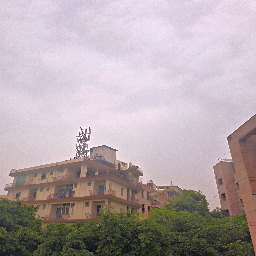

[105.32690431]


In [57]:
''' CHANGE hours, cont, ent, hum, temp, vis, deg, speed,cc, desc, trans '''
''' RF - No normalisation'''

img0path = '/content/20190713_111619_HDR.jpg'

val = []
img0 = cv2.imread(img0path)
img0 = cv2.resize(img0,(256,256))
cv2_imshow(img0)
trans_ = np.ndarray.flatten(transmission(img0,retMean = False))
ent_ = entropy(img0)
cont_ =contrast(img0)

'''CHANGE'''
hour_ = 11.0 

'''CHANGE'''
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [56, 1000, 35.6, 2500, 250, 5.1, 75, 3] 


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)
hum_ = scaler.fit_transform(hum_)
pressure_ = scaler.fit_transform(pressure_)
temp_ = scaler.fit_transform(temp_)
vis_ = scaler.fit_transform(vis_)
deg_ = scaler.fit_transform(deg_)
speed_ = scaler.fit_transform(speed_)
cc_ = scaler.fit_transform(cc_)
desc_ = scaler.fit_transform(desc_)


test0 = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(reg.predict(test0))

val.append(reg.predict(test))


##Current reading in RK Puram is 163

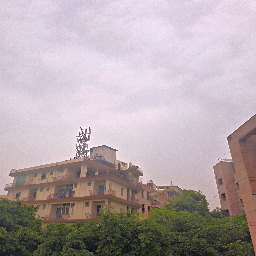

[105.32690431]


In [58]:
img2path = '/content/20190713_111619_HDR (2).jpg'

img2 = cv2.imread(img2path)
img2 = cv2.resize(img2,(256,256))
cv2_imshow(img2)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)

'''CHANGE'''
hour_ = 11.0 

'''CHANGE'''
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [56, 1000, 35.6, 2500, 250, 5.1, 75, 3]


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)
hum_ = scaler.fit_transform(hum_)
pressure_ = scaler.fit_transform(pressure_)
temp_ = scaler.fit_transform(temp_)
vis_ = scaler.fit_transform(vis_)
deg_ = scaler.fit_transform(deg_)
speed_ = scaler.fit_transform(speed_)
cc_ = scaler.fit_transform(cc_)
desc_ = scaler.fit_transform(desc_)

test2 = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))

print(reg.predict(test2))

val.append(reg.predict(test))


In [15]:
cred = credentials.Certificate('credentials.json')

# Initialize the app with a service account, granting admin privileges
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://fir-4ca2c.firebaseio.com/'
})

In [0]:
    
ref = db.reference()
df = ref.get()


In [50]:
temp_weather = {}

for key in df:
  try:
    l=[]
    l.append(df[key]['main']['humidity'])
    l.append(df[key]['main']['pressure'])
    l.append(df[key]['main']['temp'])
    l.append(df[key]['visibility'])
    l.append(df[key]['wind']['deg'])
    l.append(df[key]['wind']['speed'])
    l.append(df[key]['clouds']['all'])
    k = df[key]['weather'][0]['description']
    if(k=='haze'):
      l.append(0)
    elif(k=='mist'):
      l.append(1)
    elif(k=='drizzle'):
      l.append(2)
    elif(k=='dust'):
      l.append(3)
    temp_weather[key]=l
  except:
    print(key)

08-07-2019 02:52:50
08-07-2019 02:57:50
13-07-2019 12:43:49


In [0]:
weather={}
for key in temp_weather:
  temp=key.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  if(j<=7.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = temp[0] + '-' + temp[1] + '-' + newtemp[0] + ' ' + newesttemp[0] + ':' + '00'
  if(final not in weather):
    weather[final]=temp_weather[key]

In [0]:

for key in weather:
  if(key[:-6] == '13-07-2019'):
    print(key)
    print(weather[key])

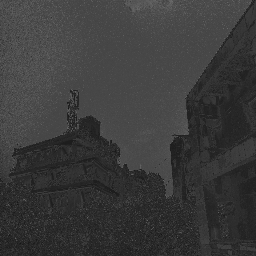

[[12.         16.39085092 17.83856773 ...  0.58415842  0.59405941
   0.59405941]]
[43.97958696]


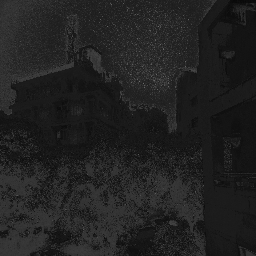

[[12.         11.99661326 16.61552811 ...  0.421875    0.703125
   0.703125  ]]
[43.97958696]


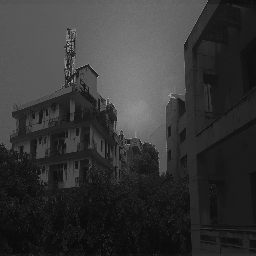

[[12.         11.99661326 16.61552811 ...  0.421875    0.703125
   0.703125  ]]
[43.67124769]


In [55]:
img1path = '/content/ldrAsus.jpg'

val = []
img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 12.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 1000, 35.74, 2500, 250, 5.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)


test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(test)
print(reg.predict(test))
val.append(reg.predict(test))


img2path = '/content/ldrLenovo(3).jpg'

img2 = cv2.imread(img2path)
img2 = cv2.resize(img2,(256,256))
cv2_imshow(img2)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)
hour_ = 12.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 1000, 35.74, 2500, 250, 5.1, 75, 3]


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)

test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(test)
print(reg.predict(test))
val.append(reg.predict(test))


img2path = '/content/ldrSam(3).jpg'

img2 = cv2.imread(img2path)
img2 = cv2.resize(img2,(256,256))
cv2_imshow(img2)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)
hour_ = 12.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 1000, 35.74, 2500, 250, 5.1, 75, 3]


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

# scaler = MinMaxScaler()

# hour_ = scaler.fit_transform(hour_)
# trans_ = scaler.fit_transform(trans_)
# cont_ = scaler.fit_transform(cont_)
# ent_ = scaler.fit_transform(ent_)
# hum_ = scaler.fit_transform(hum_)
# pressure_ = scaler.fit_transform(pressure_)
# temp_ = scaler.fit_transform(temp_)
# vis_ = scaler.fit_transform(vis_)
# deg_ = scaler.fit_transform(deg_)
# speed_ = scaler.fit_transform(speed_)
# cc_ = scaler.fit_transform(cc_)
# desc_ = scaler.fit_transform(desc_)

print(test)
test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(reg.predict(test))
val.append(reg.predict(test))

##Current reading in RK Puram is 163

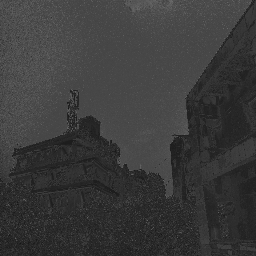

[[0. 0. 0. ... 0. 0. 0.]]
[[144.70006502]]


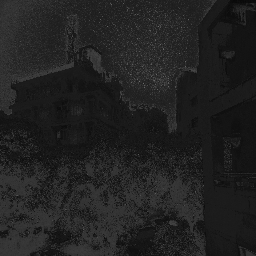

[[0. 0. 0. ... 0. 0. 0.]]
[[144.70006502]]


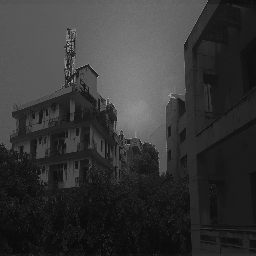

[[0. 0. 0. ... 0. 0. 0.]]
[[144.70006502]]


In [61]:
img1path = '/content/ldrAsus.jpg'

val = []
img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 12.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 1000, 35.74, 2500, 250, 5.1, 75, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)
hum_ = scaler.fit_transform(hum_)
pressure_ = scaler.fit_transform(pressure_)
temp_ = scaler.fit_transform(temp_)
vis_ = scaler.fit_transform(vis_)
deg_ = scaler.fit_transform(deg_)
speed_ = scaler.fit_transform(speed_)
cc_ = scaler.fit_transform(cc_)
desc_ = scaler.fit_transform(desc_)


test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(test)
print(lineareg.predict(test))
val.append(lineareg.predict(test))


img2path = '/content/ldrLenovo(3).jpg'

img2 = cv2.imread(img2path)
img2 = cv2.resize(img2,(256,256))
cv2_imshow(img2)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)
hour_ = 12.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 1000, 35.74, 2500, 250, 5.1, 75, 3]


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)
hum_ = scaler.fit_transform(hum_)
pressure_ = scaler.fit_transform(pressure_)
temp_ = scaler.fit_transform(temp_)
vis_ = scaler.fit_transform(vis_)
deg_ = scaler.fit_transform(deg_)
speed_ = scaler.fit_transform(speed_)
cc_ = scaler.fit_transform(cc_)
desc_ = scaler.fit_transform(desc_)

test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(test)
print(lineareg.predict(test))
val.append(lineareg.predict(test))


img2path = '/content/ldrSam(3).jpg'

img2 = cv2.imread(img2path)
img2 = cv2.resize(img2,(256,256))
cv2_imshow(img2)

trans_ = np.ndarray.flatten(transmission(img2,retMean = False))
ent_ = entropy(img2)
cont_ =contrast(img2)
hour_ = 12.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 1000, 35.74, 2500, 250, 5.1, 75, 3]


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))

scaler = MinMaxScaler()

hour_ = scaler.fit_transform(hour_)
trans_ = scaler.fit_transform(trans_)
cont_ = scaler.fit_transform(cont_)
ent_ = scaler.fit_transform(ent_)
hum_ = scaler.fit_transform(hum_)
pressure_ = scaler.fit_transform(pressure_)
temp_ = scaler.fit_transform(temp_)
vis_ = scaler.fit_transform(vis_)
deg_ = scaler.fit_transform(deg_)
speed_ = scaler.fit_transform(speed_)
cc_ = scaler.fit_transform(cc_)
desc_ = scaler.fit_transform(desc_)

print(test)
test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))
print(lineareg.predict(test))
val.append(lineareg.predict(test))

##Current reading in RK Puram is 163

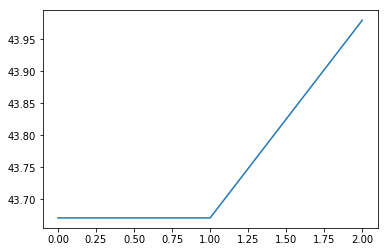

In [60]:
plt.plot(val)

SET 2 

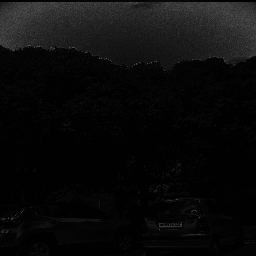

[107.59020814]
[107.59020814]


In [67]:
img1path = '/content/ldrMi2(1).jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 999, 36.05, 2000, 250, 5.1, 90, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))


test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))

# test = np.reshape(test,x_test[0].shape)


val.append(reg.predict(test))
print(reg.predict(test))


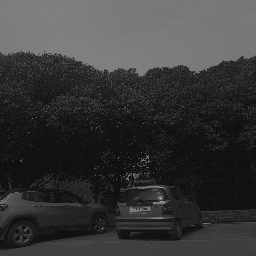

[67.22630208]
[67.22630208]


In [68]:
img1path = '/content/ldrSam2(1).jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 999, 36.05, 2000, 250, 5.1, 90, 3]



trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))


test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))

# test = np.reshape(test,x_test[0].shape)


val.append(reg.predict(test))
print(reg.predict(test))


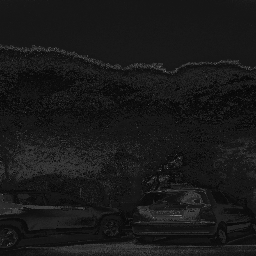

[80.21880007]


In [69]:
img1path = '/content/ldrLenovo2(1).jpg'

img1 = cv2.imread(img1path)
img1 = cv2.resize(img1,(256,256))
cv2_imshow(img1)

trans_ = np.ndarray.flatten(transmission(img1,retMean = False))
ent_ = entropy(img1)
cont_ =contrast(img1)
hour_ = 14.0
hum_,pressure_,temp_,vis_,deg_,speed_,cc_,desc_ = [53, 999, 36.05, 2000, 250, 5.1, 90, 3]



val.append(reg.predict(test))


trans_ = np.reshape(trans_,(1,-1))
hour_ = np.reshape(hour_,(1,-1))
cont_ = np.reshape(cont_,(1,-1))
ent_ = np.reshape(ent_,(1,-1))
hum_ = np.reshape(hum_,(1,-1))
pressure_ = np.reshape(pressure_,(1,-1))
temp_ = np.reshape(temp_,(1,-1))
vis_ = np.reshape(vis_,(1,-1))
deg_ = np.reshape(deg_,(1,-1))
speed_ = np.reshape(speed_,(1,-1))
cc_ = np.reshape(cc_,(1,-1))
desc_ = np.reshape(desc_,(1,-1))


test = np.hstack((hour_, cont_, ent_, hum_, temp_, vis_, deg_, speed_,cc_, desc_, trans_))

# test = np.reshape(test,x_test[0].shape)


val.append(reg.predict(test))

print(reg.predict(test))


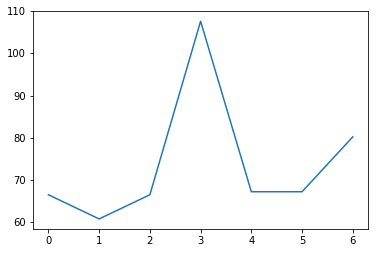

In [70]:
plt.plot(val)

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont